

---



---



---



---



# **Proyecto Final - Data Science I - Bonet Olmos, Carlos M**



---



---



---



---



# **I) Elegir un método de feature selection para reducir la dimensionalidad del dataset**

Para este dataset, creo que el método basado en modelos (usando un algoritmo como Random Forest) es una buena elección por las siguientes caracteristicas:

* Datos Mixtos (Numéricos y Categóricos): Este dataset tiene características tanto numéricas como categóricas. Los métodos basados en correlación no funcionan bien con datos categóricos sin una transformación previa. Random Forest, en cambio, maneja ambos tipos de variables sin necesidad de cambios adicionales.

* Evaluación de Importancia: Random Forest asigna una importancia a cada característica durante el proceso de entrenamiento. El modelo nos dirá qué variables son más útiles para predecir la variable objetivo (Exam_Score) basándose en su capacidad de mejorar el rendimiento general.

* Simplicidad y Rendimiento: Usando un método basado en modelos, seleccionamos automáticamente características que mejoran la predicción sin tener que calcular las correlaciones manualmente.



In [ ]:
# Conversión de Variables Categóricas a Números:

In [7]:
from sklearn.preprocessing import LabelEncoder


categorical_columns = df.select_dtypes(include=['object']).columns


le = LabelEncoder()
df_encoded = df.copy()
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])


df_encoded.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


In [ ]:
# Selección de Características:

In [8]:
from sklearn.ensemble import RandomForestRegressor

X = df_encoded.drop(columns=['Exam_Score']) # Todas las columnas menos Exam_Score
y = df_encoded['Exam_Score'] # La columna que queremos predecir

# Entrenamiento del modelo de Random Forest
feature_selector = RandomForestRegressor(n_estimators=100, random_state=42)
feature_selector.fit(X, y)

# Obtiene las importancias de las características
feature_importances = feature_selector.feature_importances_

# Creacion de lista de las características importantes (con importancia > 0.05)
important_features = X.columns[feature_importances > 0.05]
important_features


Index(['Hours_Studied', 'Attendance', 'Previous_Scores'], dtype='object')

# **II) Elegir un Algoritmo de Regresión o Clasificación para Entrenar con los Datos Elegidos**

Objetivo: Usaremos las características seleccionadas para entrenar un modelo que prediga "Exam_Score". Dado que "Exam_Score" es una variable continua (un número), un algoritmo de regresión será la mejor opción.

Para continuar con lo que se vino haciendo, seguiremos con Random Forest Regressor, ya que se adapta bien a este tipo de problemas y maneja bien conjuntos de datos mixtos.

In [ ]:
# Entrenamiento del Modelo:

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# División del dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X[important_features], y, test_size=0.3, random_state=42)

# Creación y entrenamiento del modelo con las características seleccionadas
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predecir los valores de 'Exam_Score' para el conjunto de prueba
y_pred = model.predict(X_test)


# **III) Cálculo de métricas básicas para validar el modelo**

* MAE (Error Medio Absoluto): Promedio de la magnitud de los errores.
* MSE (Error Cuadrático Medio): Promedio del cuadrado de los errores.
* RMSE (Raíz del MSE): Muestra el error en las mismas unidades que Exam_Score.
* R² Score: Indica el porcentaje de variabilidad explicada por el modelo.


MAE: 1.5995337951956712
MSE: 6.6895125339508725
RMSE: 2.586409196927445
R² Score: 0.513134897569971


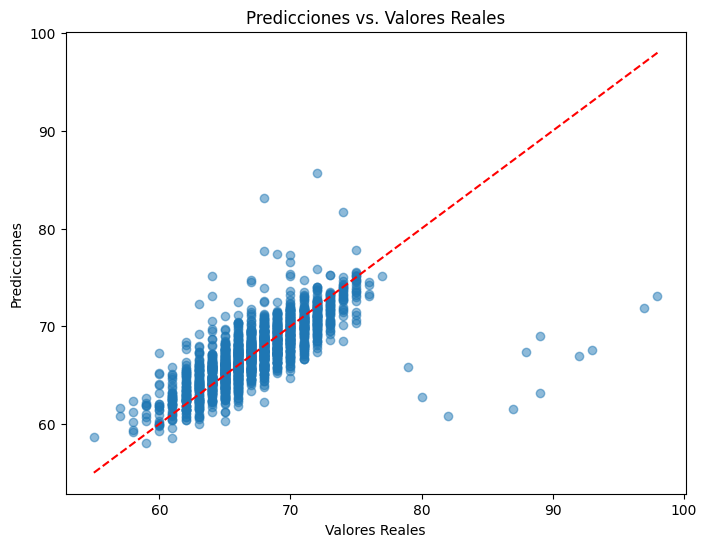

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculo de métricas de rendimiento
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

# Grafico de Dispersioón
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Linea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()


Gráfico de dispersión:

* Los puntos cercanos a la línea roja indican que las predicciones están cerca de los valores reales.
* Puntos alejados de la línea roja indican errores mayores en la predicción.



---


# **IV) Conclusiones del Modelo:**

El modelo inicial de Random Forest regresor arrojó los siguientes resultados en la predicción del Exam_Score:

*   MAE (Error Medio Absoluto): 1.60
*   MSE (Error Cuadrático Medio): 6.69
*   RMSE (Raíz del Error Cuadrático Medio): 2.59
*   R² Score: 0.51

Estas métricas reflejan el rendimiento del modelo en términos de precisión y capacidad de explicación de la variabilidad en los puntajes de exámenes.


---


**Interpretación del R² Score:**
    
  Con un R² de 0.51, el modelo explica aproximadamente el 51% de la variabilidad en los puntajes de los exámenes. Este desempeño moderado indica que el modelo capta algunos patrones significativos en los datos, pero también deja una porción considerable sin explicar, lo que sugiere que podrían faltar factores importantes en el dataset que influyen en el rendimiento académico.

---

**Precisión del Modelo (MAE y RMSE):**

El MAE de 1.60 y el RMSE de 2.59 reflejan la magnitud de los errores promedio en las predicciones. Aunque el modelo ofrece un nivel de precisión razonable, estos valores sugieren que, en algunos casos, las predicciones pueden desviarse en hasta 2-3 puntos del valor real del Exam_Score.

---

**Conclusión General y Recomendaciones:**

Los factores utilizados en el modelo (Hours_Studied, Attendance, Previous_Scores) tienen cierto impacto en los puntajes de los exámenes, pero no son suficientes para capturar la variabilidad total en el rendimiento académico.
Para mejorar el modelo, sería recomendable:
Agregar características adicionales que puedan influir en el Exam_Score, como el ambiente de estudio, el apoyo familiar, y la calidad de enseñanza.
Probar con otros algoritmos o ajustar los hiperparámetros para ver si se puede capturar una mayor porción de la variabilidad de los datos.
En general, este modelo ofrece una base inicial útil, pero los resultados sugieren que un enfoque más detallado o una ampliación del dataset podrían mejorar el desempeño predictivo.